# Analyse Exploratoire du fichier myreport_ram_full.csv

### Imports (fichier & modules)

In [1]:
import pandas as pda
import matplotlib.pyplot as plt
import numpy as np
#import os
#print(os.getcwd())
#print(os.listdir('241016_LogETL'))

In [2]:
tab = pda.read_csv('../data/logServer/myreport_ram_full.csv',sep=',')

### Le fichier myreport_ram_full.csv : taille, colonnes

In [3]:
print("il y a ",tab.shape[0]," lignes et ",tab.shape[1]," colonnes dans le data frame")

il y a  2882  lignes et  10  colonnes dans le data frame


In [4]:
tab.columns

Index(['Date et heure', 'Date et heure(RAW)', 'Mémoire disponible (%)',
       'Mémoire disponible (%)(RAW)', 'Mémoire disponible',
       'Mémoire disponible(RAW)', 'Temps mort', 'Temps mort(RAW)',
       'Couverture', 'Couverture(RAW)'],
      dtype='object')

In [5]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2882 entries, 0 to 2881
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date et heure                2882 non-null   object 
 1   Date et heure(RAW)           2881 non-null   float64
 2   Mémoire disponible (%)       2195 non-null   object 
 3   Mémoire disponible (%)(RAW)  2194 non-null   float64
 4   Mémoire disponible           2195 non-null   object 
 5   Mémoire disponible(RAW)      2194 non-null   float64
 6   Temps mort                   2195 non-null   object 
 7   Temps mort(RAW)              2194 non-null   float64
 8   Couverture                   2882 non-null   object 
 9   Couverture(RAW)              2881 non-null   float64
dtypes: float64(5), object(5)
memory usage: 225.3+ KB


On peut déjà voir que :
- faudra supprimer les colonnes 8 et 9 car elles sont vides
- colonnes 21, 23, 25, 26 contiennent certains élements vides

In [6]:
# Calculer le nombre de valeurs uniques pour chaque colonne
nb_valeurs_uniques = tab.nunique()

# Afficher les résultats
print(nb_valeurs_uniques)

Date et heure                  2882
Date et heure(RAW)             2881
Mémoire disponible (%)           18
Mémoire disponible (%)(RAW)      36
Mémoire disponible              192
Mémoire disponible(RAW)        2193
Temps mort                        1
Temps mort(RAW)                   1
Couverture                        4
Couverture(RAW)                   3
dtype: int64


En plus des colonnes 8 et 9, on pourra supprimer les colonnes 15, 16, 17. 

In [8]:
tab.head()


,Date et heure,Date et heure(RAW),Mémoire disponible (%),Mémoire disponible (%)(RAW),Mémoire disponible,Mémoire disponible(RAW),Temps mort,Temps mort(RAW),Couverture,Couverture(RAW)
0,13/08/2024 00:00:00 - 01:00:00,45516.958333,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
1,13/08/2024 01:00:00 - 02:00:00,45517.000000,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
2,13/08/2024 02:00:00 - 03:00:00,45517.041667,11 %,11.0,"7,19 Go",7.722679e+09,0 %,0.0,100 %,10000.0
3,13/08/2024 03:00:00 - 04:00:00,45517.083333,11 %,11.0,"7,16 Go",7.685439e+09,0 %,0.0,100 %,10000.0
4,13/08/2024 04:00:00 - 05:00:00,45517.125000,11 %,11.0,"7,15 Go",7.676204e+09,0 %,0.0,100 %,10000.0


## Analyse 


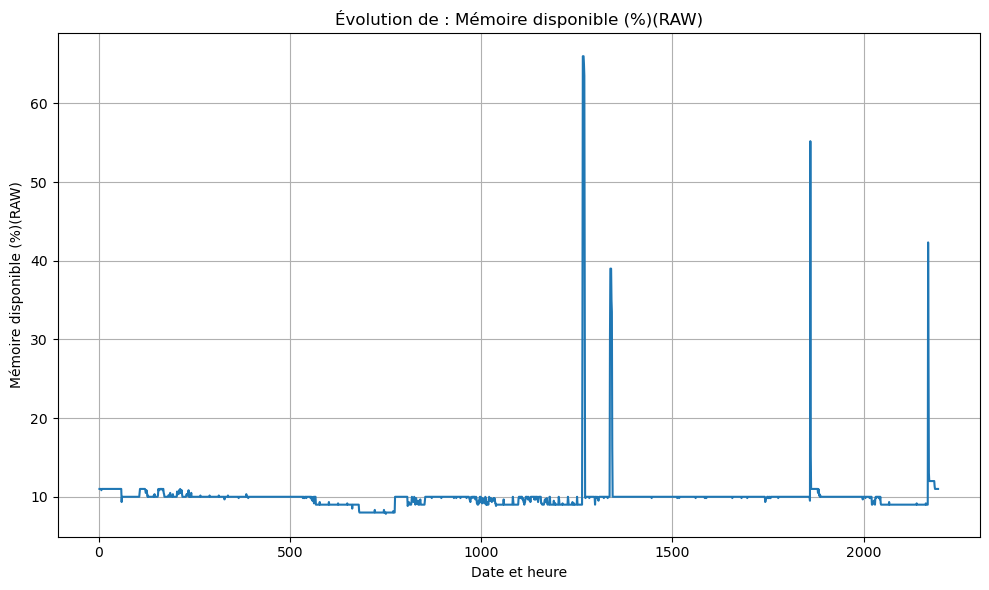

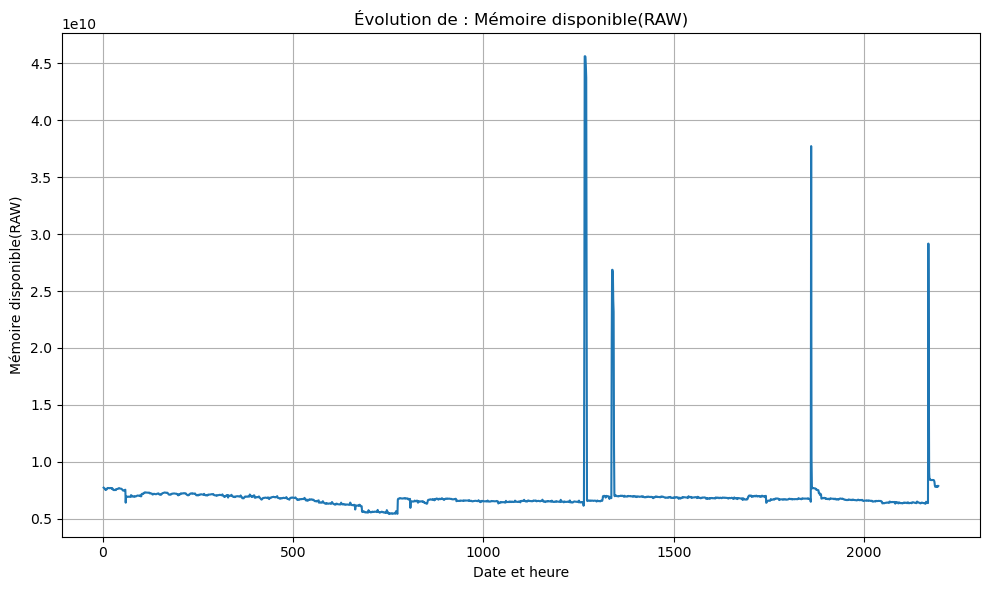

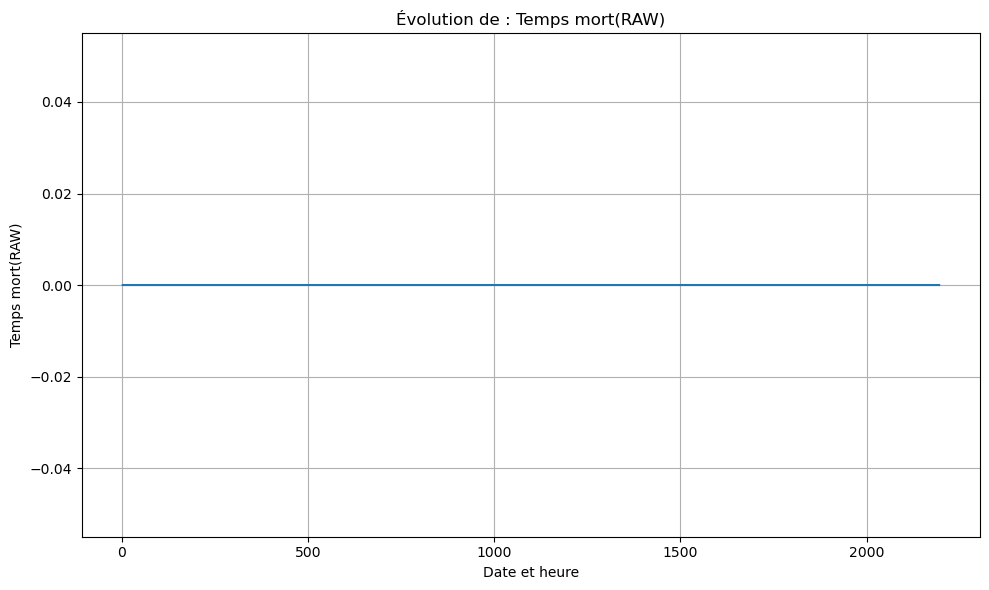

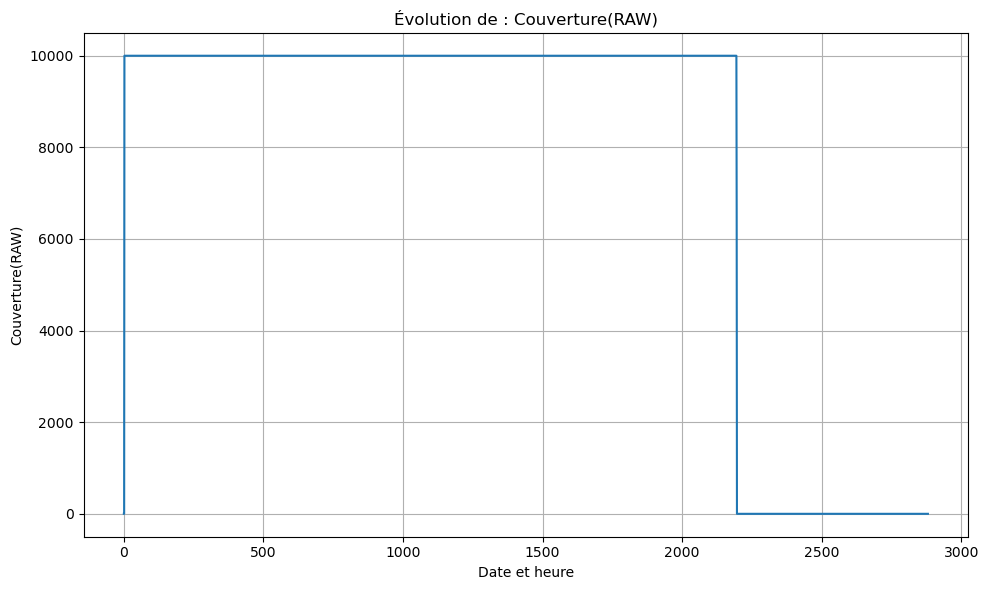

In [9]:
df=tab.copy()

# Boucle pour générer les graphiques
for col in df.columns:
    if col != 'Date et heure(RAW)' and "RAW" in col:  # Exclure la colonne 'Date et heure(RAW)'
        plt.figure(figsize=(10, 6))
        df[col].plot(kind='line', title=f'Évolution de : {col}')
        plt.xlabel('Date et heure')
        plt.ylabel(col)
        plt.grid(True)
        plt.tight_layout()
        plt.show()